In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import LinearSegmentedColormap

## Loading the CSV Data

In [2]:
df = pd.read_csv('/Users/gautamchugh/Downloads/PyProj/Python-final-project/data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


## Divding Features as Numerical and Categorical

In [5]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


## Feature Engineering

#### Encoding categorical features

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

#### Scaling Numerical Features

In [7]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,1,1,0.41,0.83,0,1,1.38,0,0.30,2,0
1,-0.48,0,2,1.49,-0.17,0,1,0.75,0,0.41,1,1
2,-1.75,1,1,-0.13,0.77,0,2,-1.53,0,0.30,2,0
3,-0.58,0,0,0.30,0.14,0,1,-1.13,1,0.47,1,1
4,0.05,1,2,0.95,-0.03,0,1,-0.58,0,0.30,2,0


In [8]:
df1.shape

(918, 12)

#### Correlation Matrix

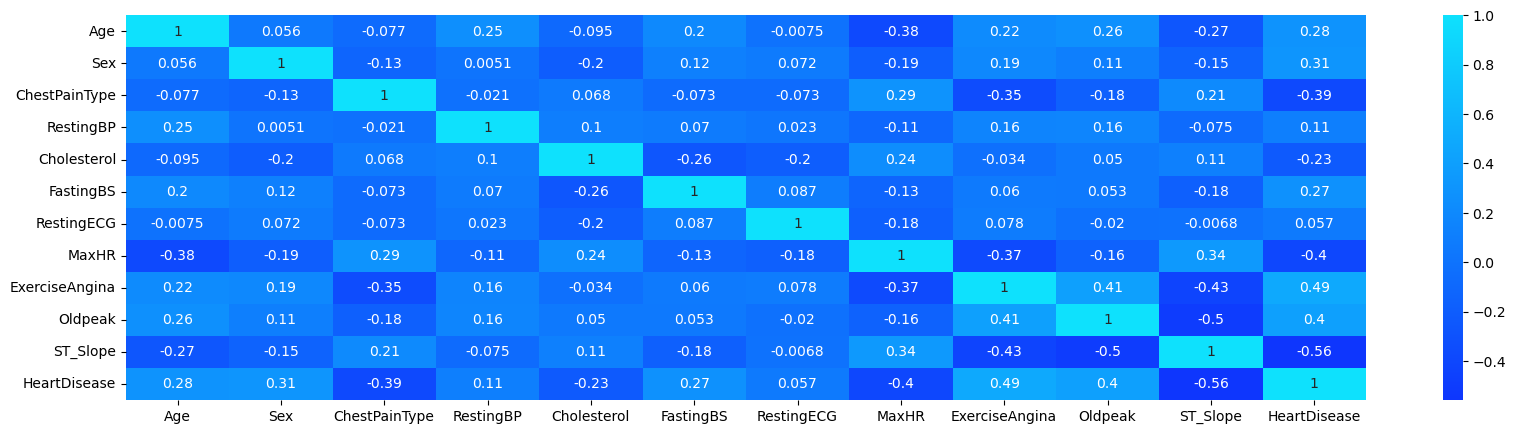

In [9]:
colors = ['#0e36fd', '#0ee1fd']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

plt.figure(figsize=(20, 5))
sns.heatmap(df1.corr(), cmap=cmap, annot=True)
plt.show()

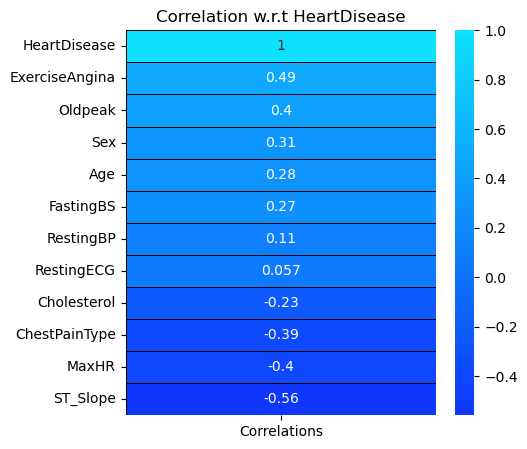

In [10]:
# Compute correlation with 'HeartDisease' column
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

# Create a custom color map using your colors
colors = ['#0e36fd', '#0ee1fd']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Create the heatmap plot
plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap=cmap, linewidths=0.4, linecolor='black')

# Set the title
plt.title('Correlation w.r.t HeartDisease')

# Show the plot
plt.show()

#### Feature Selection for Categorical Features: 

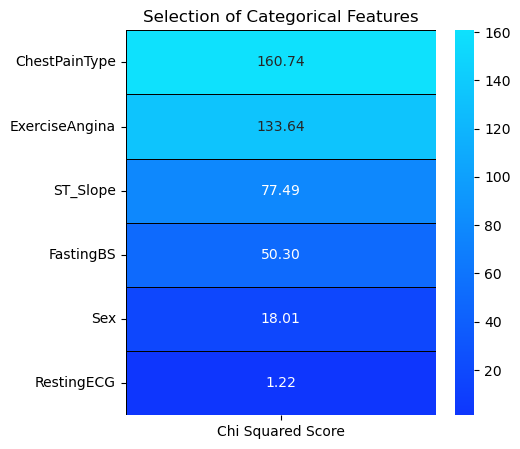

In [13]:
from sklearn.feature_selection import SelectKBest, chi2

# Splitting the features and target variable
features = df1.loc[:, categorical_features[:-1]]  # All but the last column
target = df1.loc[:, categorical_features[-1]]    # The last column

# Applying SelectKBest with chi2 as the score function
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

# Creating a DataFrame for feature scores
featureScores = pd.DataFrame(data=fit.scores_, index=features.columns, columns=['Chi Squared Score'])

# Create a custom color map using your colors
colors = ['#0e36fd', '#0ee1fd']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Create the heatmap plot
plt.subplots(figsize=(5, 5))
sns.heatmap(
    featureScores.sort_values(ascending=False, by='Chi Squared Score'),
    annot=True,
    cmap=cmap,
    linewidths=0.4,
    linecolor='black',
    fmt='.2f'
)

# Set the title
plt.title('Selection of Categorical Features')

# Show the plot
plt.show()


###### Except RestingECG, all the remaining categorical features are pretty important for predicting heart diseases.

#### Feature Selection for Numerical Features :

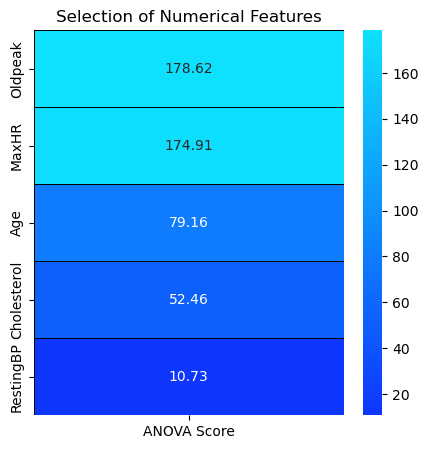

In [14]:
from sklearn.feature_selection import SelectKBest, f_classif

# Splitting the features and target variable
features = df1.loc[:, numerical_features]  # Numerical features
target = df1.loc[:, categorical_features[-1]]  # The target variable (last in the list)

# Applying SelectKBest with f_classif (ANOVA F-value) as the score function
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

# Creating a DataFrame for feature scores
featureScores = pd.DataFrame(data=fit.scores_, index=features.columns, columns=['ANOVA Score'])

# Create a custom color map using your colors
colors = ['#0e36fd', '#0ee1fd']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Create the heatmap plot
plt.subplots(figsize=(5, 5))
sns.heatmap(
    featureScores.sort_values(ascending=False, by='ANOVA Score'),
    annot=True,
    cmap=cmap,
    linewidths=0.4,
    linecolor='black',
    fmt='.2f'
)

# Set the title
plt.title('Selection of Numerical Features')

# Show the plot
plt.show()


###### We will leave out RestingBP from the modeling part and take the remaining features.

## Modelling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
# from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

#### Applying (80-20) Train-Test Split

In [22]:
features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 2)

In [36]:
def model(classifier):
    """_summary_

    :param classifier: _description_
    :type classifier: _type_
    """
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))

def model_evaluation(classifier):
    """_summary_

    :param classifier: _description_
    :type classifier: _type_
    """
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    
    # Define labels for the confusion matrix
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]

    # Reshape labels to match the confusion matrix (2x2)
    labels = np.asarray(labels).reshape(2, 2)

    # Create a custom color map using your colors
    colors = ['#0e36fd', '#0ee1fd']
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

    # Create the heatmap plot
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=labels, cmap=cmap, fmt='', linewidths=0.4, linecolor='black')

    # Set title and labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    # Show the plot
    plt.show()

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

#### 1 .Linear Regression :

Accuracy :  87.50%
Cross Validation Score :  91.11%
ROC_AUC Score :  87.43%
*******************************************************


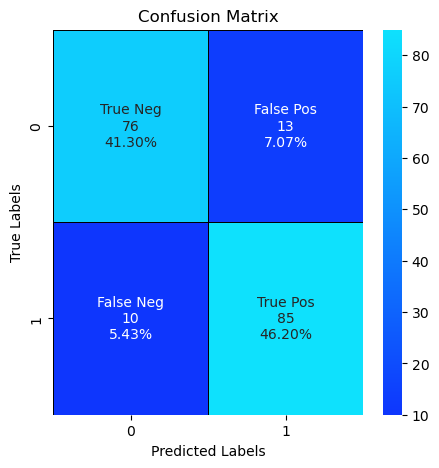

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



In [37]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

model(classifier_lr)
print('*'*55)
model_evaluation(classifier_lr)

#### 2. Decision Tree Classifier :

Accuracy :  84.78%
Cross Validation Score :  89.09%
ROC_AUC Score :  84.62%
*******************************************************


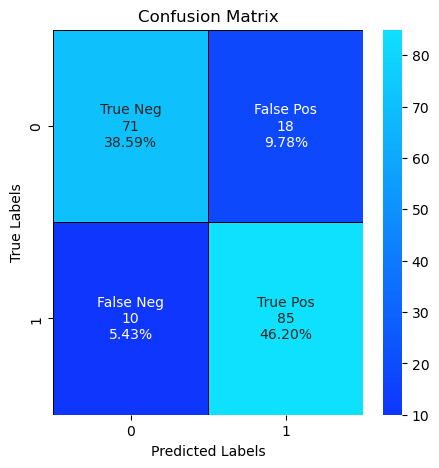

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [38]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

model(classifier_dt)
print('*'*55)
model_evaluation(classifier_dt)

#### 3. Random Forest Classifier :

Accuracy :  84.24%
Cross Validation Score :  92.91%
ROC_AUC Score :  84.06%
*******************************************************


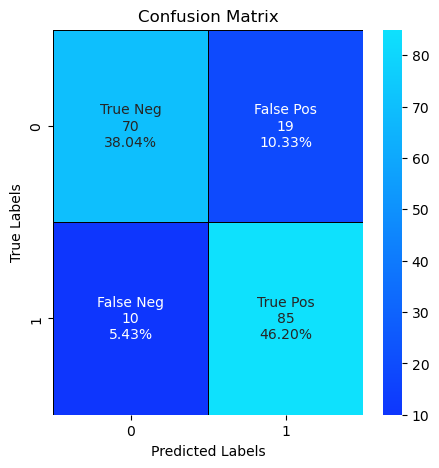

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.82      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



In [39]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

model(classifier_rf)
print('*'*55)
model_evaluation(classifier_rf)

#### 4. Support Vector Classifier :

Accuracy :  87.50%
Cross Validation Score :  90.53%
ROC_AUC Score :  87.43%
*******************************************************


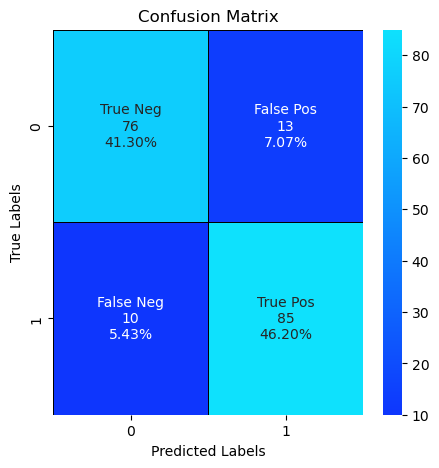

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



In [40]:
from sklearn.svm import SVC

classifier_svc = SVC(kernel = 'linear',C = 0.1)

model(classifier_svc)
print('*'*55)
model_evaluation(classifier_svc)

#### 5. K-nearest Neighbors Classifier :

Accuracy :  81.52%
Cross Validation Score :  89.34%
ROC_AUC Score :  81.36%
*******************************************************


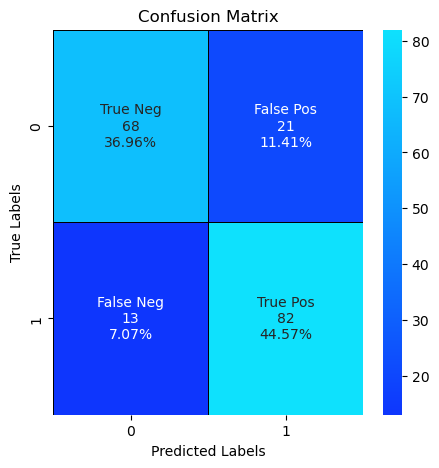

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        89
           1       0.80      0.86      0.83        95

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



In [41]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

model(classifier_knn)
print('*'*55)
model_evaluation(classifier_knn)

#### Saving the Best Model in a Pickle File

In [43]:
import pickle

features_2 = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])]

with open('model_and_data_latest.pkl', 'wb') as file:
    pickle.dump((classifier_lr, features_2), file)